## ANLY561 Homework 11
## Hongyang Zheng

### Question1


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

#### load data
data = load_breast_cancer()

# data are in rows
X_WBC = data['data']
m, n = X_WBC.shape

X_tilde = np.c_[np.ones((m, 1)), X_WBC]

# the original labels are 0/1, convert them to -1/+1, 
# and also reshape to a column vector
targets = data.target
labels = 2 * targets.reshape(-1, 1) - 1


#### split the data into training and test sets
train_size = 400
X_train = X_tilde[:train_size]
X_test = X_tilde[train_size:]
y_train = labels[:train_size]
y_test = labels[train_size:]


#### train data
X = tf.placeholder(tf.float32, shape=[None, n + 1])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

# initialize theta to the zero tensor
theta = tf.Variable(tf.zeros([n + 1, 1]))

logits = tf.matmul(X, theta)
y = tf.sigmoid(logits)

Using the negative log likelihood, which is given by

$$
\ell\left(\boldsymbol{\theta}\right)=-\sum_{i=1}^{N}\log\left(\text{logit}\left(y^{\left(i\right)}\left(\tilde{\mathbf{x}}^{\left(i\right)}\right)^{\mathsf{T}}\boldsymbol{\theta}\right)\right)
$$

where 

$$
\text{logit}\left(x\right)=\frac{1}{1+\mathrm{e}^{-x}}.
$$

In [11]:
#### function
f = -tf.reduce_mean(
    tf.log(
        tf.sigmoid(
            tf.multiply(y_, tf.matmul(X, theta))
        )
    )
)


#### set parameters
alpha = 0.1
beta = 0.5
iter = 1000

df = tf.gradients(f, theta)
theta_ = theta
theta_new = tf.placeholder(tf.float32)
theta_bt_op = tf.assign(theta_, theta_new)
update_op = tf.assign(theta, theta_)


#### prediction function
def predict(X_tilde, theta):
    
    probs = 1 / (1 + np.exp(-np.matmul(X_tilde, theta)))
    return probs >= 0.5

In [13]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(iter):
        # evaluate the gradient
        theta0 = theta.eval()
        df0 = sess.run(
            df, 
            feed_dict={X: X_train, y_: y_train, theta: theta0}
        )
        
        # set the gradient descent direction
        df0_arr = np.asarray(df0).reshape(-1,1)
        dx = -df0_arr
        
        delta = alpha * np.dot(df0_arr.reshape(-1,), dx.reshape(-1,))
        
        # evaluate the objective function at theta0
        f0 = f.eval(
            feed_dict={X: X_train, y_: y_train, theta: theta0}
        )

        # theta = theta0 + dx
        sess.run(
            theta_bt_op, feed_dict={theta_new: theta0 + dx}
        )
        
        fx = f.eval(
            feed_dict={X: X_train, y_: y_train, theta: theta_.eval()}
        )

        t = 1
        
        # backtracking loop
        while (not np.isfinite(fx)) or fx > f0 + delta * t:
            t = beta * t
            
            # theta_ = theta0 + t * dx
            sess.run(
                theta_bt_op, feed_dict={theta_new: theta0 + t * dx}
            )
            
            fx = f.eval(
                feed_dict={
                    X: X_train, y_: y_train, theta: theta_.eval()
                }
            )
        
        # update theta with the result of backtracking
        sess.run(update_op)
              
        if ((i % 100) == 0):
            y_pred = predict(X_tilde=X_train, theta=theta.eval())
            
            print(
                "LR Step:", i, 
                "\tobjective function:", fx,
                "\taccuracy:", 
                accuracy_score(y_pred, targets[:train_size])
            )
            
    # save the final iterate
    theta_ast = theta.eval()


#### calculate accuracy of the model
accuracy_score(
    targets[train_size:], 
    predict(X_test, theta_ast)
)

LR Step: 0 	objective function: 0.66897476 	accuracy: 0.4325
LR Step: 100 	objective function: 0.42489278 	accuracy: 0.9075
LR Step: 200 	objective function: 0.36169982 	accuracy: 0.9125
LR Step: 300 	objective function: 0.305695 	accuracy: 0.91
LR Step: 400 	objective function: 0.2649914 	accuracy: 0.91
LR Step: 500 	objective function: 0.25372773 	accuracy: 0.91
LR Step: 600 	objective function: 0.24462037 	accuracy: 0.9075
LR Step: 700 	objective function: 0.23653342 	accuracy: 0.91
LR Step: 800 	objective function: 0.23039341 	accuracy: 0.9125
LR Step: 900 	objective function: 0.22504833 	accuracy: 0.9125


0.9289940828402367

The model has achieved 93% accuracy on the test set.

### Question2

###### a)
Let $\mathbf{n}=\left(3,2,2,2\right)$ and let $\mathbf{m}=\left(2,2\right)$. We know that $i=\{2,3\}$ and $j=\{1,2\}$.

Therefore, we have:

$$
\mathbf{n}_{\setminus\mathbf{i}}=\left(3,2\right)\quad\text{and}\quad\mathbf{m}_{\setminus\mathbf{j}}=\left(\right)\implies\mathbf{n}_{\setminus\mathbf{i}}\oplus\mathbf{m}_{\setminus\mathbf{j}}=\left(3,2\right)
$$

which implies $\mathcal{F}$ is a second order tensor.

$$
c_{\mathbf{i},\mathbf{j}}:\mathscr{F}_{\mathbf{n}}\times\mathscr{F}_{\mathbf{m}}\rightarrow\mathscr{F}_{\mathbf{n}_{\setminus\mathbf{i}}\oplus\mathbf{m}_{\setminus\mathbf{j}}}=\mathscr{F}_{\left(3,2\right)}.
$$

Thus, $\mathcal{F}$ is a second order tensor with the shape $3\times2$.

###### b)
$\mathcal{F}=\begin{pmatrix}
\sum_{k_1=1}^{2}\sum_{k_2=1}^{2}{a_{1,k_1,k_2,1}b_{k_1,k_2}} & \sum_{k_1=1}^{2}\sum_{k_2=1}^{2}{a_{1,k_1,k_2,2}b_{k_1,k_2}}\\
\sum_{k_1=1}^{2}\sum_{k_2=1}^{2}{a_{2,k_1,k_2,1}b_{k_1,k_2}} & \sum_{k_1=1}^{2}\sum_{k_2=1}^{2}{a_{2,k_1,k_2,2}b_{k_1,k_2}}\\
\sum_{k_1=1}^{2}\sum_{k_2=1}^{2}{a_{3,k_1,k_2,1}b_{k_1,k_2}} & \sum_{k_1=1}^{2}\sum_{k_2=1}^{2}{a_{3,k_1,k_2,2}b_{k_1,k_2}}\\
\end{pmatrix}$

Denote $\mathcal{F}=\begin{pmatrix}
f_{1,1}& f_{1,2} \\
f_{2,1}& f_{2,2} \\
f_{3,1}& f_{3,2} 
\end{pmatrix}$

Compute by hand:
$$
\begin{align*}
f_{1,1} & =a_{1,1,1,1}b_{1,1}+a_{1,1,2,1}b_{1,2}+a_{1,2,1,1}b_{2,1}+a_{1,2,2,1}b_{2,2}\\
 & =1\cdot1+\left(-2\right)\left(-1\right)+1\left(-2\right)+\left(-2\right)2\\
 & =-3\\
f_{1,2} & =a_{1,1,1,2}b_{1,1}+a_{1,1,2,2}b_{1,2}+a_{1,2,1,2}b_{2,1}+a_{1,2,2,2}b_{2,2}\\
 & =\left(-1\right)1+1\left(-1\right)+1\left(-2\right)+2\cdot2\\
 & =0\\
f_{2,1} & =a_{2,1,1,1}b_{1,1}+a_{2,1,2,1}b_{1,2}+a_{2,2,1,1}b_{2,1}+a_{2,2,2,1}b_{2,2}\\
 & =2\cdot1+\left(-1\right)\left(-1\right)+2\left(-2\right)+1\cdot2\\
 & =1\\
f_{2,2} & =a_{2,1,1,2}b_{1,1}+a_{2,1,2,2}b_{1,2}+a_{2,2,1,2}b_{2,1}+a_{2,2,2,2}b_{2,2}\\
 & =\left(-1\right)1+1\left(-1\right)+1\left(-2\right)+2\cdot2\\
 & =0\\
f_{3,1} & =a_{3,1,1,1}b_{1,1}+a_{3,1,2,1}b_{1,2}+a_{3,2,1,1}b_{2,1}+a_{3,2,2,1}b_{2,2}\\
 & =1\cdot1+\left(-2\right)\left(-1\right)+1\left(-2\right)+\left(-1\right)2\\
 & =-1\\
f_{3,2} & =a_{3,1,1,2}b_{1,1}+a_{3,1,2,2}b_{1,2}+a_{3,2,1,2}b_{2,1}+a_{3,2,2,2}b_{2,2}\\
 & =\left(-2\right)1+1\left(-1\right)+1\left(-2\right)+1\cdot2\\
 & =-3
\end{align*}
$$

Therefore, $$
\mathcal{F}=\begin{pmatrix}-3 & 0\\
1 & 0\\
-1 & -3
\end{pmatrix}
$$

In [8]:
import tensorflow as tf
import numpy as np

# This is a 3 by 2 by 2 by 2 tensor
A = tf.Variable([[[[1, -1], [-2, 1]],[[1, 1], [-2, 2]]],[[[2, -1], [-1, 1]],[[2, 1], [1, 2]]],[[[1, -2], [-2, 1]],[[1, 1], [-1, 1]]]], name='A') 
# This is a 2 by 2 tensor
B = tf.Variable([[1, -1], [-2, 2]], name='B') # This is a 2 by 2 tensor
f = tf.tensordot(A, B, [[1,2], [0,1]]) # Contraction along a single index pair

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result = f.eval()

print('The result computed by this program is:')
print(result)

The result computed by this program is:
[[-3  0]
 [ 1  0]
 [-1 -3]]


The result is the same with the one computed by hand.

### Question 3
###### a)
Since our topic is inpainting images, we first convert a 256 by 256 image into 256 16px by 16px patches. Therefore, our data set is a 256 by 16 by 16 by 4 array. We have 256 data points and one field.

<br>
###### b)
We make histogram for the image.

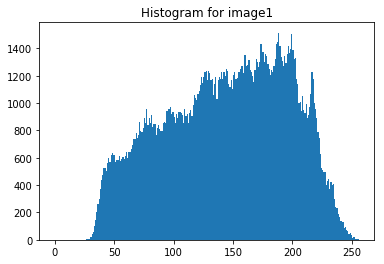

In [5]:
# Import libraries
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from pylab import *
from skimage import data, io, color
#import scipy.misc as smp


#### Convert 256 by 256 images into 16px x 16px patches
im = Image.open('img2.png')
pixels = list(im.getdata())
width, height = im.size
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]
pixels = np.asarray(pixels)

#block row size
p = 16  
#block column size   
q = 16     

block_array = []
previous_row = 0
for row_block in range(0,16):
    previous_row = row_block * p   
    previous_column = 0
    for column_block in range(0,16):
        previous_column = column_block * q
        block = pixels[previous_row:previous_row+p,previous_column:previous_column+q]
        block_array.append(block)
block_array = np.asarray(block_array)
###############################################################################


#### Plot histogram
# Read image
image1=cv2.imread('img2.png')

# Show image
#io.imshow(image1)

# Plot histogram
hist = cv2.calcHist([image1],[0],None,[256],[0,256])
plt.hist(image1.ravel(),256,[0,256])
plt.title('Histogram for image1')
plt.show()

###### c)

Variance retained 85.06280385458922 %
Compression Ratio 0.6510416666666667 %


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


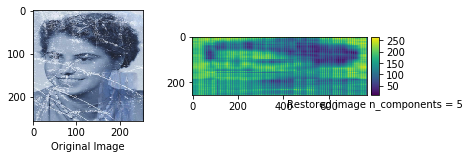

Variance retained 96.30437223348873 %
Compression Ratio 3.2552083333333335 %


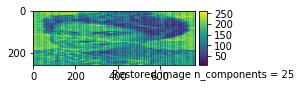

Variance retained 99.20168940688812 %
Compression Ratio 16.276041666666664 %


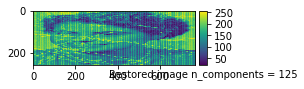

In [4]:
#### PCA
subplot(2, 2, 1)
io.imshow(image1)
xlabel('Original Image')

# Reshape the data from 3D to 2D
nsamples, nx, ny = image1.shape
image_dataset = image1.reshape((nsamples,nx*ny))

# PCA for different components
for i in range(1, 4):
    n_comp = 5 ** i
    pca = PCA(n_components = n_comp)
    pca.fit(image_dataset)
    image_pca = pca.fit_transform(image_dataset)
    
    #subplot(2, 2, 2)
    #io.imshow(image1)
    #xlabel('Image after applying PCA')
    image_restored = pca.inverse_transform(image_pca)
    
    subplot(2, 2, i+1)
    io.imshow(image_restored)
    xlabel('Restored image n_components = %s' %n_comp)
    print('Variance retained %s %%' %((1 - sum(pca.explained_variance_ratio_) / size(pca.explained_variance_ratio_)) * 100))
    print('Compression Ratio %s %%' %(float(size(image_pca)) / size(image_dataset) * 100))
    show()